 ================Import Required Libraries ===================

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image


=======Load CIFAR-10 Dataset from Local Files ==================

In [13]:
# Change this to your folder path
data_dir = "/home/soorajnair/Documents/2_Cloud/TASEK_S/Task_11/cifar-10-batches-py"

def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        # Reshape to (num_images, 32, 32, 3)
        data = data.reshape(len(data), 3, 32, 32).transpose(0, 2, 3, 1)
        return data, labels

# Load training data
x_train, y_train = [], []
for i in range(1, 6):
    batch_file = os.path.join(data_dir, f"data_batch_{i}")
    data, labels = load_cifar_batch(batch_file)
    x_train.append(data)
    y_train.extend(labels)
x_train = np.concatenate(x_train)
y_train = np.array(y_train)

# Load test data
x_test, y_test = load_cifar_batch(os.path.join(data_dir, "test_batch"))
y_test = np.array(y_test)


=============Display First 25 Images in a Grid ======================

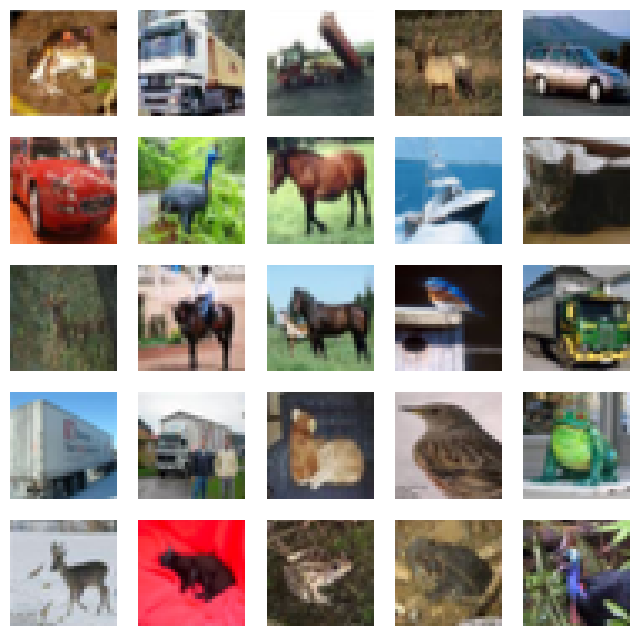

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis("off")
plt.show()


================Check Image Shape ==========================

In [15]:
print("Image shape:", x_train[0].shape)  # (32, 32, 3)
print("Height:", x_train[0].shape[0])
print("Width:", x_train[0].shape[1])
print("Channels:", x_train[0].shape[2])

Image shape: (32, 32, 3)
Height: 32
Width: 32
Channels: 3


======Convert Image to NumPy Array & Show Pixel Values ========

In [16]:
img_array = np.array(x_train[0])
print("Numpy array shape:", img_array.shape)
print("Pixel values for first image:\n", img_array)

Numpy array shape: (32, 32, 3)
Pixel values for first image:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


=============Show RGB Channels Separately ============

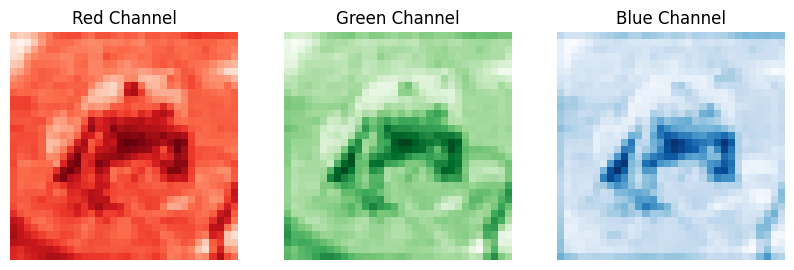

In [17]:
img = x_train[0]
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(img[:, :, 0], cmap='Reds')
axs[0].set_title("Red Channel")
axs[0].axis("off")

axs[1].imshow(img[:, :, 1], cmap='Greens')
axs[1].set_title("Green Channel")
axs[1].axis("off")

axs[2].imshow(img[:, :, 2], cmap='Blues')
axs[2].set_title("Blue Channel")
axs[2].axis("off")

plt.show()


==========Apply Basic Image Transformations ===============

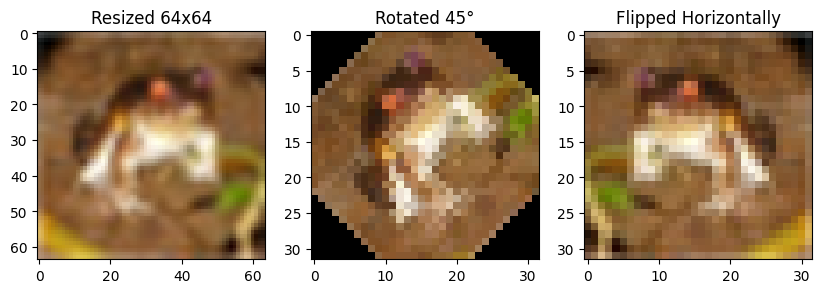

In [18]:
# Resize
img_resized = np.array(Image.fromarray(img).resize((64, 64)))

# Rotate
img_rotated = np.array(Image.fromarray(img).rotate(45))

# Flip horizontally
img_flipped = np.array(Image.fromarray(img).transpose(Image.FLIP_LEFT_RIGHT))

# Display transformations
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(img_resized)
axs[0].set_title("Resized 64x64")
axs[1].imshow(img_rotated)
axs[1].set_title("Rotated 45°")
axs[2].imshow(img_flipped)
axs[2].set_title("Flipped Horizontally")
plt.show()



===========Calculate Basic Image Statistics===================

In [19]:
mean_val = np.mean(x_train)
std_val = np.std(x_train)
print(f"Mean pixel value: {mean_val:.2f}")
print(f"Standard deviation: {std_val:.2f}")

Mean pixel value: 120.71
Standard deviation: 64.15


===========Save Processed Images to Disk ===================

In [20]:
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

Image.fromarray(img_resized).save(os.path.join(output_dir, "image_resized.png"))
Image.fromarray(img_rotated).save(os.path.join(output_dir, "image_rotated.png"))
Image.fromarray(img_flipped).save(os.path.join(output_dir, "image_flipped.png"))

print("Processed images saved to:", output_dir)


Processed images saved to: processed_images
